# R Coding Assignment \#10: Exponential Random Graph Models

### Sheetal Parikh
EN.605.631.81<br>
November 22, 2020
***
***

## Problem 1
 Import the Gray’s Anatomy data and create a network object in statnet.

In [58]:
setwd("C:/Users/Sheetal/Documents/Sheetal/Stat Methods/Class Code/Reference Data")
#install.packages("statnet")
library("statnet")
library("ergm")

# Loading Data

#adjacency matrix
#using commas to separate cells, header with node ID, and first column has node ID
net.matrix <- as.matrix(read.table("gray-adj.csv", 
                                sep=",", 
                                header=T, 
                                row.names=1, 
                                quote="\""))

#attributes file
net.attr <- read.csv("gray-attr.csv",  
                  header=TRUE, 
                  sep=",", 
                  stringsAsFactors = FALSE)

#Converting data into network object
#this is an undirected network
net <- network(net.matrix, 
                vertex.attr = net.attr,
                vertex.attrnames = colnames(net.attr),
                directed=F, 
                loops=F, 
                multiple=F, 
                bipartite=F, 
                hyper=F)

#printing network info
net


 Network attributes:
  vertices = 44 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 49 
    missing edges= 0 
    non-missing edges= 49 

 Vertex attribute names: 
    birthyear name position race season sex sign vertex.names 

No edge attributes

## Problem 2
Use an ERGM to construct a restricted model consisting of an edges term and one triadic term.  Why is it inappropriate to include a reciprocity term?

It is inapprpriate to include a reciprocity term because our network is undirected and so has edges that doesn't have any direction.  Reciprocity measures the tendency of ties to be reciprocated and therefore in order to include a reciprocity term it would make sense to have a directed network.

As per the results of the restricted model below, having a triangle is significiant in the network.

In [59]:
#restricted model - edge terms and triadic term
suppressMessages(model1<-ergm(net~edges+triangle)) 
summary(model1)

Call:
ergm(formula = net ~ edges + triangle)

Iterations:  2 out of 20 

Monte Carlo MLE Results:
         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -3.0356     0.1706      0 -17.789   <1e-04 ***
triangle   0.7544     0.4246      0   1.777   0.0756 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  383.7  on 944  degrees of freedom
 
AIC: 387.7    BIC: 397.4    (Smaller is better.) 

## Problem 3
Plot a visualization of the network where the nodes are:

1.) Colored based on gender

2.) Sized based on betweenness centrality

3.) Labels are displayed for the most central nodes

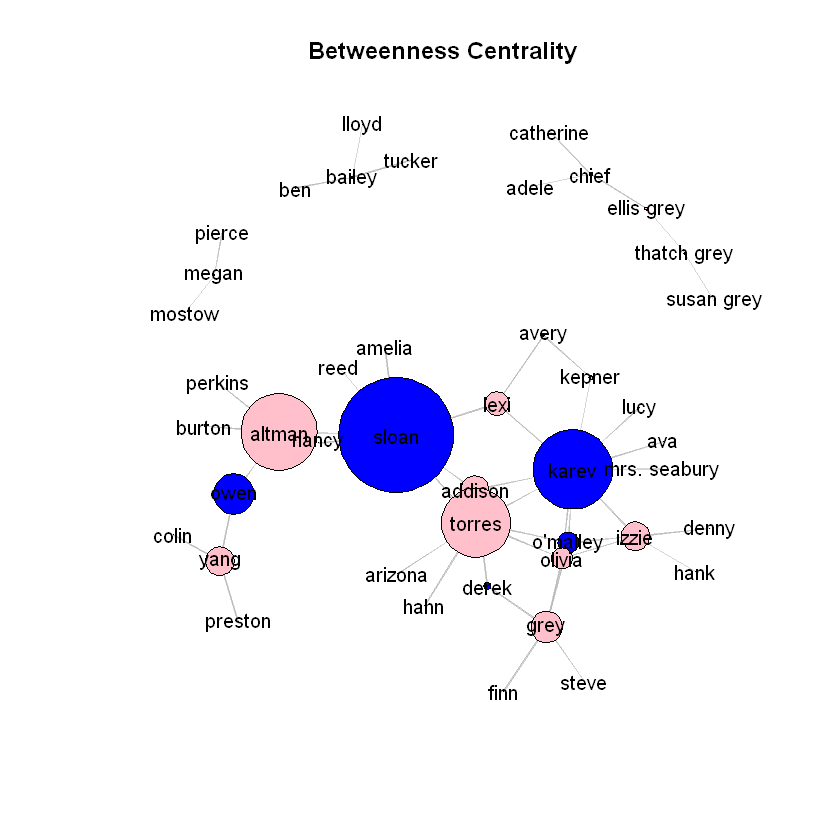

In [60]:
# Calculating betweenness of network - proportion of shortest paths that pass through a vertex
bc <- betweenness(net,rescale=T)

# Plotting network with node size proportional to betweenness centrality

#normalizing
nbc <- bc/max(bc)

#Setting random number as seed to replicate plot
set.seed(5)

#plotting network
plot.network(net,
     displaylabels=T,
     label=get.vertex.attribute(net,"name"),
     vertex.cex=10*nbc,
     label.cex=1,
     edge.col=rgb(150,150,150,100,maxColorValue=255),
     label.pos=5,
     main="Betweenness Centrality",
     #colored based on gender        
     vertex.col=c("blue","pink")[1+(get.vertex.attribute(net, "sex")=="F")])

In the figure above, the pink nodes represent females and the blue nodes represent males

## Problem 4
Use an ERGM to test the likelihood that gender homophily is present in the network.  Why might your network fail to converge when you use both a triadic term and gender homophily term? Explain with a well formatted markdown paragraph in your R jupyter notebook.

As per the ERGM below, nodematch.sex is highly signficiant.  However, the coefficient is negative.  This implies that heterosexuality is highly signficiant or that there is a significant level of heterophily in the network.  The presence of a triadic term such as a triangle, coincides with homosexuality.  Therefore, adding a triadic term may cause the network to fail to converge as both a triadic term and gender homophily would be suggesting the opposite conclusion.

In [61]:
#testing likelihood that gender homophily present
suppressMessages(model2<-ergm(net~edges+nodematch("sex")))  
summary(model2)

Call:
ergm(formula = net ~ edges + nodematch("sex"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -2.3256     0.1598      0 -14.555   <1e-04 ***
nodematch.sex  -2.0073     0.4408      0  -4.553   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  354.1  on 944  degrees of freedom
 
AIC: 358.1    BIC: 367.8    (Smaller is better.) 

## Problem 5
Plot a visualization of the network where the nodes are:

1.) Colored based on race 

2.) Sized based on betweenness centrality 

3.) Labels are displayed for the most central nodes.

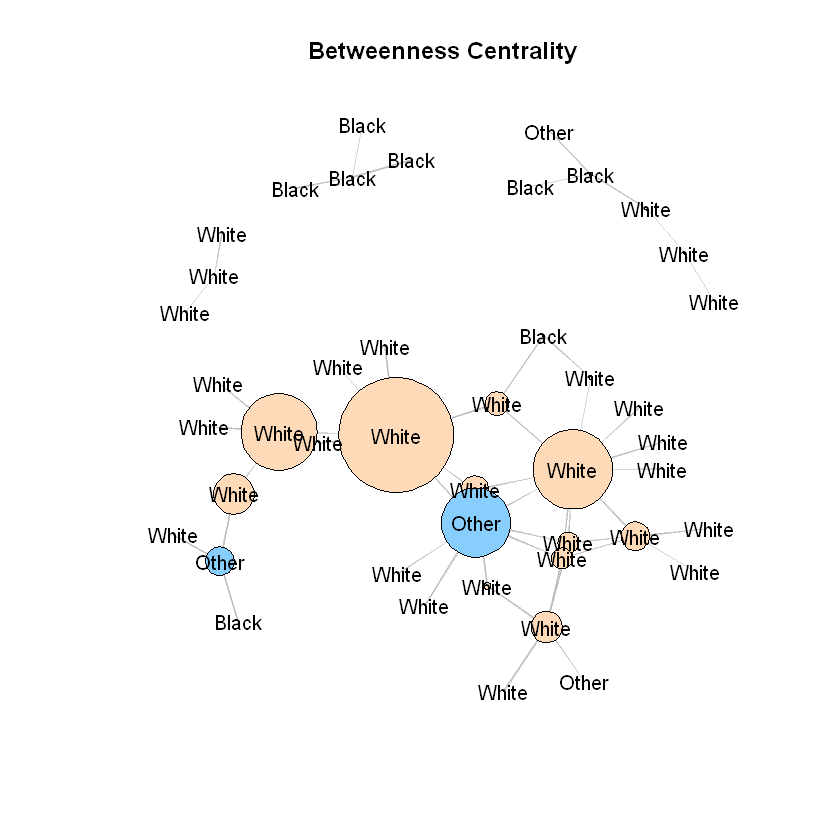

In [62]:
# calculting betweenness 
bc <- betweenness(net,rescale=T)

# Ploting network with node size proportional to betweenness centrality

#normalizing
nbc <- bc/max(bc)

## Set random number seed so the plot is replicable
set.seed(5)

#setting the number of verticies
nodes <- 44

#function for assigning a different colored vertice according to race
node_colors <- rep("",nodes)
for(i in 1:nodes){
  if(get.vertex.attribute(net,"race")[i] == "Black"){
    node_colors[i] <- "maroon"
  } else if (get.vertex.attribute(net,"race")[i] == "White") {
    node_colors[i] <- "peachpuff" 
  }else{
    node_colors[i] <- "skyblue1"
  }
}
#print(node_colors)

#plotting network
plot.network(net,
     displaylabels=T,
     label=get.vertex.attribute(net,"race"),
     vertex.cex=10*nbc,
     label.cex=1,
     edge.col=rgb(150,150,150,100,maxColorValue=255),
     label.pos=5,
     main="Betweenness Centrality",
     vertex.col=node_colors)

In the figure above, the peach colored nodes represent the "White" characters, the maroon nodes represent the "Black" characters and the light blue nodes represent characters that are a race other than "White" or "Black".

## Problem 6
Use an ERGM to test the likelihood that racial homophily is present in the network.

As per the ERGM below, racial homophily is signficiant in the network.

In [63]:
#testing likeliood that racial homophily is present
suppressMessages(model3<-ergm(net~edges+nodematch("race")))  
summary(model3)

Call:
ergm(formula = net ~ edges + nodematch("race"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
               Estimate Std. Error MCMC % z value Pr(>|z|)    
edges           -3.3574     0.2719      0 -12.349   <1e-04 ***
nodematch.race   0.7082     0.3233      0   2.191   0.0285 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  380.4  on 944  degrees of freedom
 
AIC: 384.4    BIC: 394.1    (Smaller is better.) 

## Problem 7
Use an ERGM to test both race and gender homophily.

As per the ERGM below, both race and gender homophily are signficant in the network.

In [64]:
#testing both race and gender homophily
suppressMessages(model4<-ergm(net~edges+nodematch("sex")+nodematch("race"))) 
summary(model4)

Call:
ergm(formula = net ~ edges + nodematch("sex") + nodematch("race"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
               Estimate Std. Error MCMC % z value Pr(>|z|)    
edges           -2.7978     0.2795      0  -10.01   <1e-04 ***
nodematch.sex   -2.0272     0.4416      0   -4.59   <1e-04 ***
nodematch.race   0.7530     0.3275      0    2.30   0.0215 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  348.4  on 943  degrees of freedom
 
AIC: 354.4    BIC: 369    (Smaller is better.) 

## Problem 8
Use the code provided on the in-class slides for stochastic actor-oriented models and work through the example.  Note: on some systems, the includeEffects command to remove a term may result in an error message.  If you get this, simply re-run getEffects, omitting the terms you want to remove.

In [79]:
#install.packages("RSiena")
library("RSiena")

#Step 1 - Data Formatting

#Reading in Data
#Wave 1
s501d<-read.table("s50-network1.dat", header=FALSE, sep=" ", quote="\"'")
#s50 is a group of 50 actors from public health study
#[,2:51] - extra column due to space in the original data set - therefore 2:51
#gives 50 by 50 matrix
s501<-as.matrix(s501d[,2:51])

#Wave 2
s502d<-read.table("s50-network2.dat", header=FALSE, sep=" ", quote="\"'")
s502<-as.matrix(s502d[,2:51])

#Wave 3
s503d<-read.table("s50-network3.dat", header=FALSE, sep=" ", quote="\"'")
s503<-as.matrix(s503d[,2:51])

#Reading in Attributes
s50a<-read.table("s50-alcohol.dat", header=FALSE, sep=" ", quote="\"'")
s50s<-read.table("s50-smoke.dat", header=FALSE, sep=" ", quote="\"'")

#Names for Data Structures
friend.data.w1 <- s501
friend.data.w2 <- s502
friend.data.w3 <- s503
drink <- as.matrix(s50a[,2:4])
smoke <- as.matrix(s50s[,2:4])


In [38]:
#Step 2 - Data Specification

#telling RSiena the order of networks and data dimensions
friendship <- sienaDependent(
  array( c( friend.data.w1, friend.data.w2, friend.data.w3 ),
         dim = c( 50, 50, 3 ) ) )

#setting smoke as constant covariate from wave 1
smoke1 <- coCovar( smoke[ , 1 ] )

#setting drink as varying covariate
alcohol <- varCovar( drink )

#combining dependent and independent attributes
mydata <- sienaDataCreate( friendship, smoke1, alcohol )

#printing result
mydata

Dependent variables:  friendship 
Number of observations: 3 

Nodeset                  Actors 
Number of nodes              50 

Dependent variable friendship      
Type               oneMode         
Observations       3               
Nodeset            Actors          
Densities          0.046 0.047 0.05

Constant covariates:  smoke1 
Changing covariates:  alcohol 

In [80]:
#Step 3 - Model Specification

#check which effects are included in the model(default settings)
myeff <- getEffects( mydata )

#see current model specification
myeff

,name,effectName,functionName,shortName,interaction1,interaction2,type,basicRate,include,randomEffects,...,effect3,interactionType,local,setting,effectFn,statisticFn,netType,groupName,group,effectNumber
friendship.rate.1,friendship,constant friendship rate (period 1),Amount of network change in period 1,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,1
friendship.rate.2,friendship,constant friendship rate (period 2),Amount of network change in period 2,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,2
friendship.rate.3,friendship,outdegree effect on rate friendship,Amount of change x outdegrees,outRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,3
friendship.rate.4,friendship,indegree effect on rate friendship,Amount of change x indegrees,inRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,4
friendship.rate.5,friendship,reciprocity effect on rate friendship,Amount of change x reciprocity,recipRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,5
friendship.rate.6,friendship,effect 1/outdegree on rate friendship,Amount of change x (1/outdegrees),outRateInv,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,6
friendship.rate.7,friendship,effect ln(outdegree+1) on rate friendship,Amount of change x ln(outdegrees+1),outRateLog,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,7
friendship.rate.8,friendship,effect smoke1 on rate,Amount of change x smoke1,RateX,smoke1,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,8
friendship.rate.9,friendship,effect alcohol on rate,Amount of change x alcohol,RateX,alcohol,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,9
friendship.obj.eval.1,friendship,outdegree (density),Number of ties,density,,,eval,FALSE,TRUE,TRUE,...,0,dyadic,TRUE,,NULL,NULL,oneMode,Group1,1,10


In [81]:
#Step 3 - Model Specification - cont...

#defining effects to include in co-evolution model
myeff <- getEffects( mydata )
myeff <- includeEffects( myeff, transTrip, cycle3 )
#check with effects included in model
myeff


  effectName          include fix   test  initialValue parm
1 transitive triplets TRUE    FALSE FALSE          0   0   
2 3-cycles            TRUE    FALSE FALSE          0   0   


,name,effectName,functionName,shortName,interaction1,interaction2,type,basicRate,include,randomEffects,...,effect3,interactionType,local,setting,effectFn,statisticFn,netType,groupName,group,effectNumber
friendship.rate.1,friendship,constant friendship rate (period 1),Amount of network change in period 1,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,1
friendship.rate.2,friendship,constant friendship rate (period 2),Amount of network change in period 2,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,2
friendship.rate.3,friendship,outdegree effect on rate friendship,Amount of change x outdegrees,outRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,3
friendship.rate.4,friendship,indegree effect on rate friendship,Amount of change x indegrees,inRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,4
friendship.rate.5,friendship,reciprocity effect on rate friendship,Amount of change x reciprocity,recipRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,5
friendship.rate.6,friendship,effect 1/outdegree on rate friendship,Amount of change x (1/outdegrees),outRateInv,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,6
friendship.rate.7,friendship,effect ln(outdegree+1) on rate friendship,Amount of change x ln(outdegrees+1),outRateLog,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,7
friendship.rate.8,friendship,effect smoke1 on rate,Amount of change x smoke1,RateX,smoke1,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,8
friendship.rate.9,friendship,effect alcohol on rate,Amount of change x alcohol,RateX,alcohol,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,9
friendship.obj.eval.1,friendship,outdegree (density),Number of ties,density,,,eval,FALSE,TRUE,TRUE,...,0,dyadic,TRUE,,NULL,NULL,oneMode,Group1,1,10


In [82]:
# To remove an effect: the 3-cycle effects
myeff <- includeEffects( myeff, cycle3, include=FALSE )

# check which effects are now included in model
myeff

[1] effectName   include      fix          test         initialValue
[6] parm        
<0 rows> (or 0-length row.names)


,name,effectName,functionName,shortName,interaction1,interaction2,type,basicRate,include,randomEffects,...,effect3,interactionType,local,setting,effectFn,statisticFn,netType,groupName,group,effectNumber
friendship.rate.1,friendship,constant friendship rate (period 1),Amount of network change in period 1,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,1
friendship.rate.2,friendship,constant friendship rate (period 2),Amount of network change in period 2,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,2
friendship.rate.3,friendship,outdegree effect on rate friendship,Amount of change x outdegrees,outRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,3
friendship.rate.4,friendship,indegree effect on rate friendship,Amount of change x indegrees,inRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,4
friendship.rate.5,friendship,reciprocity effect on rate friendship,Amount of change x reciprocity,recipRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,5
friendship.rate.6,friendship,effect 1/outdegree on rate friendship,Amount of change x (1/outdegrees),outRateInv,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,6
friendship.rate.7,friendship,effect ln(outdegree+1) on rate friendship,Amount of change x ln(outdegrees+1),outRateLog,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,7
friendship.rate.8,friendship,effect smoke1 on rate,Amount of change x smoke1,RateX,smoke1,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,8
friendship.rate.9,friendship,effect alcohol on rate,Amount of change x alcohol,RateX,alcohol,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,9
friendship.obj.eval.1,friendship,outdegree (density),Number of ties,density,,,eval,FALSE,TRUE,TRUE,...,0,dyadic,TRUE,,NULL,NULL,oneMode,Group1,1,10


In [83]:
#Step 4 - Model Estimation

#define the model as data + effects:
myalgorithm <- sienaAlgorithmCreate(projname = 's50_3')

# redefine model specification
myeff1 <- getEffects( mydata )

myeff2 <- includeEffects( myeff, transTrip, cycle3 )
myeff3 <- includeEffects( myeff, egoX, altX, egoXaltX,
                         interaction1 = "alcohol" )
myeff3

siena07 will create an output file s50_3.txt .
  effectName          include fix   test  initialValue parm
1 transitive triplets TRUE    FALSE FALSE          0   0   
2 3-cycles            TRUE    FALSE FALSE          0   0   
  effectName                  include fix   test  initialValue parm
1 alcohol alter               TRUE    FALSE FALSE          0   0   
2 alcohol ego                 TRUE    FALSE FALSE          0   0   
3 alcohol ego x alcohol alter TRUE    FALSE FALSE          0   0   


,name,effectName,functionName,shortName,interaction1,interaction2,type,basicRate,include,randomEffects,...,effect3,interactionType,local,setting,effectFn,statisticFn,netType,groupName,group,effectNumber
friendship.rate.1,friendship,constant friendship rate (period 1),Amount of network change in period 1,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,1
friendship.rate.2,friendship,constant friendship rate (period 2),Amount of network change in period 2,Rate,,,rate,TRUE,TRUE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,2
friendship.rate.3,friendship,outdegree effect on rate friendship,Amount of change x outdegrees,outRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,3
friendship.rate.4,friendship,indegree effect on rate friendship,Amount of change x indegrees,inRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,4
friendship.rate.5,friendship,reciprocity effect on rate friendship,Amount of change x reciprocity,recipRate,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,5
friendship.rate.6,friendship,effect 1/outdegree on rate friendship,Amount of change x (1/outdegrees),outRateInv,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,6
friendship.rate.7,friendship,effect ln(outdegree+1) on rate friendship,Amount of change x ln(outdegrees+1),outRateLog,,,rate,FALSE,FALSE,FALSE,...,0,,TRUE,,NULL,NULL,oneMode,Group1,1,7
friendship.rate.8,friendship,effect smoke1 on rate,Amount of change x smoke1,RateX,smoke1,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,8
friendship.rate.9,friendship,effect alcohol on rate,Amount of change x alcohol,RateX,alcohol,,rate,FALSE,FALSE,FALSE,...,0,,FALSE,,NULL,NULL,oneMode,Group1,1,9
friendship.obj.eval.1,friendship,outdegree (density),Number of ties,density,,,eval,FALSE,TRUE,TRUE,...,0,dyadic,TRUE,,NULL,NULL,oneMode,Group1,1,10


In [84]:
#Step 4 - Model Estimation - cont...

#estimate model - myeff1
ans1 <- siena07( myalgorithm, data = mydata, effects = myeff1)

#summary of results
ans1

Estimates, standard errors and convergence t-ratios

                                   Estimate   Standard   Convergence 
                                                Error      t-ratio   

Rate parameters: 
  0.1      Rate parameter period 1  5.7175  ( 0.8846   )             
  0.2      Rate parameter period 2  4.5152  ( 0.6925   )             

Other parameters: 
  1.  eval outdegree (density)     -2.3779  ( 0.1023   )   0.0347    
  2.  eval reciprocity              2.8522  ( 0.1830   )   0.0093    

Overall maximum convergence ratio:    0.0507 


Total of 2242 iteration steps.


In [85]:
#estimate model - myeff2
ans2 <- siena07( myalgorithm, data = mydata, effects = myeff2)

#summary of results
ans2

Estimates, standard errors and convergence t-ratios

                                   Estimate   Standard   Convergence 
                                                Error      t-ratio   

Rate parameters: 
  0.1      Rate parameter period 1  6.5778  ( 1.1719   )             
  0.2      Rate parameter period 2  5.2671  ( 0.9002   )             

Other parameters: 
  1.  eval outdegree (density)     -2.7007  ( 0.1232   )   -0.0387   
  2.  eval reciprocity              2.4982  ( 0.2098   )   -0.0093   
  3.  eval transitive triplets      0.6606  ( 0.1444   )    0.0021   
  4.  eval 3-cycles                -0.0831  ( 0.2826   )    0.0128   

Overall maximum convergence ratio:    0.1175 


Total of 1763 iteration steps.


In [86]:
#estimate model - myeff3
ans3 <- siena07( myalgorithm, data = mydata, effects = myeff3)

#summary of results
ans3

Estimates, standard errors and convergence t-ratios

                                       Estimate   Standard   Convergence 
                                                    Error      t-ratio   

Rate parameters: 
  0.1      Rate parameter period 1      6.6060  ( 1.1125   )             
  0.2      Rate parameter period 2      5.2308  ( 0.8647   )             

Other parameters: 
  1.  eval outdegree (density)         -2.6997  ( 0.1190   )   -0.0438   
  2.  eval reciprocity                  2.4160  ( 0.2045   )   -0.0510   
  3.  eval transitive triplets          0.6093  ( 0.0785   )   -0.0807   
  4.  eval alcohol alter               -0.0533  ( 0.0680   )   -0.1813   
  5.  eval alcohol ego                  0.0171  ( 0.0705   )   -0.1366   
  6.  eval alcohol ego x alcohol alter  0.1333  ( 0.0504   )   -0.0998   

Overall maximum convergence ratio:    0.2032 


Total of 2145 iteration steps.


In [87]:
# redefine model specification - to include all terms in example
myeff <- getEffects( mydata )

myeff <- includeEffects( myeff, transTrip, cycle3 )
myeff <- includeEffects( myeff, egoX, altX, egoXaltX,
                         interaction1 = "alcohol" )
myeff <- includeEffects( myeff, simX, interaction1 = "smoke1" )

#estimate model - myeff4
ans4 <- siena07( myalgorithm, data = mydata, effects = myeff)

#summary of results
ans4

  effectName          include fix   test  initialValue parm
1 transitive triplets TRUE    FALSE FALSE          0   0   
2 3-cycles            TRUE    FALSE FALSE          0   0   
  effectName                  include fix   test  initialValue parm
1 alcohol alter               TRUE    FALSE FALSE          0   0   
2 alcohol ego                 TRUE    FALSE FALSE          0   0   
3 alcohol ego x alcohol alter TRUE    FALSE FALSE          0   0   
  effectName        include fix   test  initialValue parm
1 smoke1 similarity TRUE    FALSE FALSE          0   0   


Estimates, standard errors and convergence t-ratios

                                       Estimate   Standard   Convergence 
                                                    Error      t-ratio   

Rate parameters: 
  0.1      Rate parameter period 1      6.5851  ( 1.1462   )             
  0.2      Rate parameter period 2      5.2197  ( 0.8716   )             

Other parameters: 
  1.  eval outdegree (density)         -2.7318  ( 0.1236   )    0.0397   
  2.  eval reciprocity                  2.4492  ( 0.2183   )    0.0490   
  3.  eval transitive triplets          0.6652  ( 0.1395   )    0.0226   
  4.  eval 3-cycles                    -0.1240  ( 0.2670   )    0.0193   
  5.  eval smoke1 similarity            0.2579  ( 0.1991   )   -0.0250   
  6.  eval alcohol alter               -0.0225  ( 0.0675   )    0.0495   
  7.  eval alcohol ego                  0.0356  ( 0.0751   )    0.0385   
  8.  eval alcohol ego x alcohol alter  0.1266  ( 0.0512   )    0.0647   

Overall maximum con

## Problem 9
Remove the statistically insignificant terms from the model and estimate effects.

A term is significant if it is more than two standard errors away from 0.  From the estimate above (ans4) we can see that "Other parameters" numbered 4-7(3-cycles, smoke1 similarity, alcohol alter, alcohol ego) are statistically insignificant as they are less than two standard errors away from 0.  However, it is possible that 3-cycles term is insignificant due to the presence of the transitive triplets.  In the example below, the insignificant terms smoke 1 similarity, alcohol alter, and alcohol ego were removed.  Transitive triplets was also removed to see the effect on 3 cycles.  As can be seen below, after removing transitive triplets, 3-cycles appears to be significant.

In [88]:
#removing statistically insignificant terms: smoke1 similarity, alcohol alter and alcohol ego 
#also removed significant term : transitive triplets

#is a lot of the variance due to the transitive triples - have just transitive triples or just 3 cycles
# redefine model specification
myeff <- getEffects( mydata )
myeff <- includeEffects( myeff, cycle3)
myeff <- includeEffects( myeff, egoXaltX,
                         interaction1 = "alcohol" )

  effectName include fix   test  initialValue parm
1 3-cycles   TRUE    FALSE FALSE          0   0   
  effectName                  include fix   test  initialValue parm
1 alcohol ego x alcohol alter TRUE    FALSE FALSE          0   0   


In [89]:
#estimate model
ans <- siena07( myalgorithm, data = mydata, effects = myeff)

#summary of results
ans

Estimates, standard errors and convergence t-ratios

                                       Estimate   Standard   Convergence 
                                                    Error      t-ratio   

Rate parameters: 
  0.1      Rate parameter period 1      6.7655  ( 1.1740   )             
  0.2      Rate parameter period 2      5.2463  ( 0.8726   )             

Other parameters: 
  1.  eval outdegree (density)         -2.7446  ( 0.1316   )    0.0011   
  2.  eval reciprocity                  2.5753  ( 0.2004   )   -0.0060   
  3.  eval 3-cycles                     1.1255  ( 0.1548   )    0.0045   
  4.  eval alcohol ego x alcohol alter  0.1450  ( 0.0517   )    0.0328   

Overall maximum convergence ratio:    0.0425 


Total of 2360 iteration steps.


In the example below, the insignificant terms smoke 1 similarity, alcohol alter, alcohol ego, and 3-cycles were removed. 

In [90]:
#removing statistically insignificant terms: smoke1 similarity, alcohol alter, alcohol ego, 3 cycles

# redefine model specification
myeff <- getEffects( mydata )
myeff <- includeEffects( myeff, transTrip)
myeff <- includeEffects( myeff, egoXaltX,
                         interaction1 = "alcohol" )

  effectName          include fix   test  initialValue parm
1 transitive triplets TRUE    FALSE FALSE          0   0   
  effectName                  include fix   test  initialValue parm
1 alcohol ego x alcohol alter TRUE    FALSE FALSE          0   0   


In [91]:
#estimate model
ans <- siena07( myalgorithm, data = mydata, effects = myeff)

#summary of results
ans

Estimates, standard errors and convergence t-ratios

                                       Estimate   Standard   Convergence 
                                                    Error      t-ratio   

Rate parameters: 
  0.1      Rate parameter period 1      6.5846  ( 1.1532   )             
  0.2      Rate parameter period 2      5.1740  ( 0.8857   )             

Other parameters: 
  1.  eval outdegree (density)         -2.7028  ( 0.1220   )   -0.0044   
  2.  eval reciprocity                  2.4203  ( 0.1981   )    0.0195   
  3.  eval transitive triplets          0.6110  ( 0.0748   )    0.0291   
  4.  eval alcohol ego x alcohol alter  0.1305  ( 0.0514   )    0.0747   

Overall maximum convergence ratio:    0.1038 


Total of 1767 iteration steps.


## References

https://bookdown.org/markhoff/social_network_analysis/centrality.html

http://brucedesmarais.com/Tutorial.html

https://rpubs.com/pjmurphy/546652

https://dnac.ssri.duke.edu/r-labs/2017/02_descriptive_statistics.php

https://www.mjdenny.com/Preparing_Network_Data_In_R.html
